In [1]:
from fast.atomic_structure_Rb import State, make_list_of_states
from sympy import Integer
from math import pi,exp

In [2]:
iso=85
ground=State(iso,5,0,1/Integer(2))
ground

85Rb 5S_1/2

In [3]:
magnetic_states=make_list_of_states([ground],"magnetic")
magnetic_states

[85Rb 5S_1/2^2,-2,
 85Rb 5S_1/2^2,-1,
 85Rb 5S_1/2^2,0,
 85Rb 5S_1/2^2,1,
 85Rb 5S_1/2^2,2,
 85Rb 5S_1/2^3,-3,
 85Rb 5S_1/2^3,-2,
 85Rb 5S_1/2^3,-1,
 85Rb 5S_1/2^3,0,
 85Rb 5S_1/2^3,1,
 85Rb 5S_1/2^3,2,
 85Rb 5S_1/2^3,3]

In [4]:
e1=magnetic_states[0]

In [5]:
hbar=1.054571800e-34 #J*s
kB=1.38064852e-23 # J*K

In [6]:
E=[hbar*2*pi*e.nu for e in magnetic_states]
E

[-1.1733739171326158e-24,
 -1.1733739171326158e-24,
 -1.1733739171326158e-24,
 -1.1733739171326158e-24,
 -1.1733739171326158e-24,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25]

In [7]:
T=20#Celsius degrees.
T=T+237.15 #Kelvin
T=1e-2
T

0.01

In [8]:
Z=sum([exp(-E[i]/kB/T) for i in range(len(magnetic_states))])
Z

24542.31898732592

In [9]:
p=[exp(-E[i]/kB/T)/Z for i in range(len(magnetic_states))]
p

[0.1999998682280615,
 0.1999998682280615,
 0.1999998682280615,
 0.1999998682280615,
 0.1999998682280615,
 9.412281319936907e-08,
 9.412281319936907e-08,
 9.412281319936907e-08,
 9.412281319936907e-08,
 9.412281319936907e-08,
 9.412281319936907e-08,
 9.412281319936907e-08]

Which is close to assigning populations equally:

In [10]:
p_deg=[1.0/len(magnetic_states) for i in range(len(magnetic_states))]
p_deg

[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333]

Let's make a plot of the variation with temperature.

In [11]:
if iso==85:
    a=5
else:
    a=3

In [12]:
P1=sum(p[:a])
P2=sum(p[a:])
P1,P2

(0.9999993411403075, 6.588596923955834e-07)

In [13]:
def get_energies(iso):
    ground=State(iso,5,0,1/Integer(2))
    magnetic_states=make_list_of_states([ground],"magnetic")
    E=[hbar*2*pi*e.nu for e in magnetic_states]
    return E

In [14]:
def pops(T,E,iso):
    if iso==85:
        a=5
    else:
        a=3

    ground=State(iso,5,0,1/Integer(2))
    magnetic_states=make_list_of_states([ground],"magnetic")
        
    Z=sum([exp(-E[i]/kB/T) for i in range(len(magnetic_states))])
    p=[exp(-E[i]/kB/T)/Z for i in range(len(magnetic_states))]
    return p[0],p[-1],sum(p[:a]),sum(p[a:])

In [15]:
from numpy import logspace,array
T=logspace(-2,2,201)

In [16]:
E85=get_energies(85)
E87=get_energies(87)

In [17]:
dat=array([pops(Ti,E85,85) for Ti in T])
p185=dat[:,0]
p285=dat[:,1]
P185=dat[:,2]
P285=dat[:,3]

In [18]:
dat=array([pops(Ti,E87,87) for Ti in T])
p187=dat[:,0]
p287=dat[:,1]
P187=dat[:,2]
P287=dat[:,3]

In [19]:
from matplotlib import pyplot
%matplotlib inline

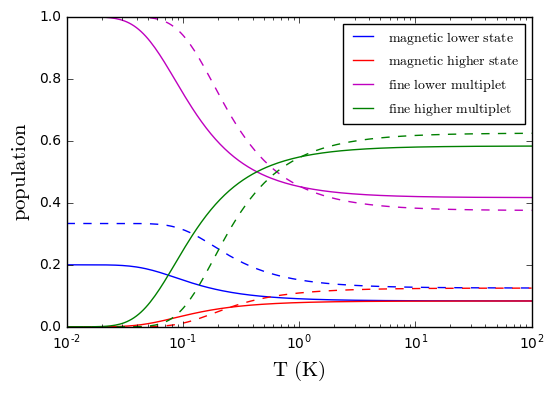

In [20]:
pyplot.close("all")
pyplot.semilogx(T,p185,"b",label=r"$\mathrm{magnetic \ lower \ state}$")
pyplot.semilogx(T,p285,"r",label=r"$\mathrm{magnetic \ higher \ state}$")
pyplot.semilogx(T,P185,"m",label=r"$\mathrm{fine \ lower \ multiplet}$")
pyplot.semilogx(T,P285,"g",label=r"$\mathrm{fine \ higher \ multiplet}$")

pyplot.semilogx(T,p187,"b--")
pyplot.semilogx(T,p287,"r--")
pyplot.semilogx(T,P187,"m--")
pyplot.semilogx(T,P287,"g--")

pyplot.ylabel(r"$\mathrm{population}$",fontsize=15)
pyplot.xlabel(r"$\mathrm{T} \ \mathrm{(K)}$",fontsize=15)
pyplot.legend(fontsize=10)

Here solid lines show the populations for $^{85}\mathrm{Rb}$ and dashed lines for $^{87}\mathrm{Rb}$. So we can see that $^{85}\mathrm{Rb}$ is thermalized at slightly lower temperatures than $^{87}\mathrm{Rb}$: at about 5 and 10 Kelvin respectively all magnetic states reach the same population.